<a href="https://colab.research.google.com/github/lelouch0204/CSF425-Deep-Learning/blob/main/Assignment-3-Forehead%20matching/SIFT_SURF_ORB_AKAZE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall opencv-python
!pip install opencv-contrib-python==3.4.2.17

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6 MB 27 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt 
import os
from natsort import natsorted
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root = '/content/drive/MyDrive/Datasets/Ass-3'
data_path = '/content/drive/MyDrive/Datasets/Ass-3/foreheadData'

In [ ]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ##img = cv2.equalizeHist(img)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    clahe = cv2.createCLAHE(clipLimit=3)
    img = clahe.apply(img)
    ##img = cv2.Canny(img)
    return img

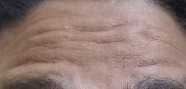

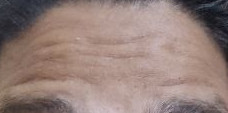

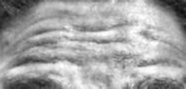

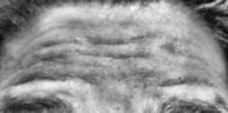

(None, None)

In [ ]:
temp_img1 = cv2.imread('/content/drive/MyDrive/Datasets/Ass-3/foreheadData/10_P1_S1_1.jpg')
temp_img2 = cv2.imread('/content/drive/MyDrive/Datasets/Ass-3/foreheadData/10_P1_S1_2.jpg')
cv2_imshow(temp_img1), cv2_imshow(temp_img2)

temp_img1 = preprocess(temp_img1)
temp_img2 = preprocess(temp_img2)
cv2_imshow(temp_img1), cv2_imshow(temp_img2)

In [ ]:
def match_features(output_file, algo, bf):
    output = []
    genuine = []
    imposter = []
    for images in natsorted(os.listdir(data_path)):
        str1 = str(images)
        if str1=='.ipynb_checkpoints':
            continue
        img1 = os.path.join(data_path, images)
        #print(img1)
        img1 = cv2.imread(img1)
        img1 = preprocess(img1)
        kp1, des1 = algo.detectAndCompute(img1,None)
        if len(kp1)>0:
            for image in natsorted(os.listdir(data_path)):
                img2 = os.path.join(data_path, image)
                str2 = str(image)
                ##print(str1) 
                #print(str2)
                if str1 == '.ipynb_checkpoints' or str2 == '.ipynb_checkpoints':
                    continue
                if (str1.split("_")[2]==str2.split("_")[2]):
                    #print(str1.split("_"))
                    continue
                if (img1 != img2):
                    img2 = cv2.imread(img2)
                    img2 = preprocess(img2)
                    kp2, des2 = algo.detectAndCompute(img2,None)
                
                    if des1 is None:
                        ##file1.write( str1 + " " + str2 + " " + "0" +"\n")
                        output.append([str1, str2, 0])
                        print(str1 + " " + str2 + " " + str(0))
                        continue
                    if des2 is None:
                        ##file1.write( str1 + " " + str2 + " " + "0"+"\n")
                        output.append([str1, str2, 0])
                        print(str1 + " " + str2 + " " + str(0))
                        continue
                    #  print(des1)
                    #  print(des2)
                    #  print(type(des1),type(des2))
                    matches = bf.knnMatch(des1,des2, k=2)
                    dis = bf.match(des1,des2)
                    #----------------------------------------------
                    number_keypoints = 0
                    if len(kp1) <= len(kp2):
                        number_keypoints = len(kp1)
                    else:
                        number_keypoints = len(kp2)
                    good = []
                    #print(matches)
                    try:
                        for m,n in matches:
                            if m.distance < 0.9*n.distance:
                                good.append([m])
                    except:
                        pass 
                    score = len(good) / number_keypoints
                    if(score>1):
                        output.append([str1, str2, score])
                        print(str1 + " " + str2 + " " + str(score))
                        if (str1.split("_")[0]==str2.split("_")[0]):
                            genuine.append(score)
                        else:
                            imposter.append(score)
                    else:
                        output.append([str1, str2, score])
                        print(str1 + " " + str2 + " " + str(score))
                        if (str1.split("_")[0]==str2.split("_")[0]):
                                genuine.append(score)
                        else:
                            imposter.append(score)
    output_df = pd.DataFrame(output)
    output_df.to_csv(output_file)

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create()
akaze = cv2.AKAZE_create()
bf = cv2.BFMatcher()

In [ ]:
algos = [sift, surf, orb, akaze]

In [ ]:
output_file = data_root + 'output_akaze_1.csv'

In [ ]:
match_features(output_file, akaze, bf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Streaming output truncated to the last 5000 lines.
26_P1_S1_3.jpg 7_P2_S2_2.jpg 0.0
26_P1_S1_3.jpg 7_P2_S2_3.jpg 0.16666666666666666
26_P1_S1_3.jpg 8_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 8_P1_S2_2.jpg 0.3333333333333333
26_P1_S1_3.jpg 8_P1_S2_3.jpg 0.5
26_P1_S1_3.jpg 8_P2_S2_1.jpg 0.0
26_P1_S1_3.jpg 8_P2_S2_2.jpg 0.16666666666666666
26_P1_S1_3.jpg 8_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 9_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 9_P1_S2_2.jpg 0.16666666666666666
26_P1_S1_3.jpg 9_P1_S2_3.jpg 0.16666666666666666
26_P1_S1_3.jpg 9_P2_S2_1.jpg 0.16666666666666666
26_P1_S1_3.jpg 9_P2_S2_2.jpg 0.16666666666666666
26_P1_S1_3.jpg 9_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 10_P1_S2_1.jpg 0.3333333333333333
26_P1_S1_3.jpg 10_P1_S2_2.jpg 0.0
26_P1_S1_3.jpg 10_P1_S2_3.jpg 0.16666666666666666
26_P1_S1_3.jpg 10_P2_S2_1.jpg 0.0
26_P1_S1_3.jpg 10_P2_S2_2.jpg 0.0
26_P1_S1_3.jpg 10_P2_S2_3.jpg 0.16666666666666666
26_P1_S1_3.jpg 11_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 11_P1_S2_2.jpg 0.3333333333333333
26_P1_S1_3.jpg 11_P1_S2_3.jpg 0.1666666666